# Community Detection Algorithm

In [558]:
#Importing libraries used in notebooks
import pandas as pd
from scipy import stats
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches as mpatches

## Import Data

In [588]:
#Import dat
CleanDataAllGoals=pd.read_pickle('CleanDataAllGoals')
#Import correlation data
CorrelationAllGoals=pd.read_pickle('CorrelationAllGoals')
#Import indicator list
with open(r'/Users/bkemp/Data Science/Project/IndicatorList.ob','rb') as fp:
        IndicatorList= pickle.load(fp)

In [594]:
#Check correlation is correct
CorrelationAllGoals;

## Creating Network

In [561]:
#Creating blank Network for community detection
G=nx.Graph()
#Copying correlation matrix
corrmat=CorrelationAllGoals.copy() 
#Enter threshold for network (0.6)
threshold=input('Enter Threshold to Use: ')
#Get correlation matrix values (edges)
netval=corrmat.values
    
#Get correlation names (nodes)
netNode=list(corrmat.index.get_level_values(2))

#Add edges and nodes into network
for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:#Don't want correlation with own node
                if netval[m,n]>float(threshold):#Want connections above threshold
                    G.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))#Add edge for two nodes

Enter Threshold to Use: 0.6


In [475]:
#Check edges between nodes and that the corresponding weight is correct
G.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', {'weight': 0.0024539877300613355}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_BOTHSEX_', {'weight': 0.0030691798681671267}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_FEMALE_', {'weight': 0.0030691798681671267}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_FEMALE_', {'weight': 0.0030705007803584206}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_MALE_', {'weight': 0.025137768942871785}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_MALE_', {'weight': 0.0030691798681671267}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_MALE_', {'weight': 0.003684751858127777}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_BOTHSEX_', {'weight': 0.021485389599666505}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_FEMALE_', {'weight': 0.006141756169205093}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--URBAN_', {'weight': 0.37758800283503846}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--RURAL_', {'weight': 0.15702479338842978}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--ALLAREA_', {'weight': 0.1517538662656499}), ('SI_POV_DAY1-

## Performing Algorithm

In [611]:
#Import algorithms from cdlib (community discovery library)
from cdlib import algorithms

In [564]:
#Perform Leiden algorithm on network where output is communities found
coms = algorithms.leiden(G,weights='weight')

### Looking at the size of the communities and the total number of indicators present

In [630]:
#Set total to zero each time so we don't keep on adding to it everytime code is run
Total = 0

#Loop for determining length of each community in terms of number of nodes and then printing it
for x in range(0,len(coms.communities)):
    print('Community',x+1,'-',len(coms.communities[x]))
    #Add lengths of communities to get total nodes in network (confirm all nodes have been classified)
    Total = Total + len(coms.communities[x])
print('Total number of indicators:',Total)

Community 1 - 316
Community 2 - 154
Community 3 - 56
Community 4 - 49
Community 5 - 2
Total number of indicators: 577


### Investigating the communities further

In [624]:
#If we want to investigate communities can get different information
print(coms.method_name)#Algorithm used
print(len(coms.communities), 'Communities')#Number of communities
print(coms.communities) #List of lists of communities

Leiden
5 Communities
[['SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', 'SI_POV_EMP1--15+_BOTHSEX_', 'SI_POV_EMP1--15+_FEMALE_', 'SI_POV_EMP1--25+_FEMALE_', 'SI_POV_EMP1--15-24_MALE_', 'SI_POV_EMP1--15+_MALE_', 'SI_POV_EMP1--25+_MALE_', 'SI_POV_EMP1--15-24_BOTHSEX_', 'SI_POV_EMP1--15-24_FEMALE_', 'SP_ACS_BSRVH2O--URBAN_', 'SP_ACS_BSRVH2O--RURAL_', 'SP_ACS_BSRVH2O--ALLAREA_', 'SP_ACS_BSRVSAN--RURAL_', 'SP_ACS_BSRVSAN--ALLAREA_', 'SP_ACS_BSRVSAN--URBAN_', 'SD_XPD_ESED--', 'SN_ITK_DEFC--', 'SN_ITK_DEFCN--', 'SH_STA_STNTN--<5Y_', 'SH_STA_ANEM--15-49_FEMALE_', 'SH_STA_ANEM_NPRG--15-49_FEMALE_', 'SH_STA_ANEM_PREG--15-49_FEMALE_', 'SH_STA_MORT--FEMALE_', 'SH_STA_BRTC--', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SH_DYN_MORT--<5Y_FEMALE_', 'SH_DYN_MORTN--<5Y_MALE_', 'SH_DYN_MORTN--<5Y_FEMALE_', 'SH_DYN_MORTN--<5Y_BOT

### Looking at the similarity and classification in the communities

In [567]:
#List for indicators split into goals 1-17
lists=IndicatorList
#Gls variable set for naming in loop
Gls=list(range(1,18))

#Similarity is how much of community 1 is Goal 1 etc (i.e which is the most popular goal in 
#that community and so likely to be that goal) [Similarity is used for our classification]
query = coms.communities #Get list of communities
#Set empty lists
OVRsimilarity = []
OVRsimilarityValues = []

#Loop for length of number of communities
for x in range(0,len(query)):
    #Set empty lists
    similarity = []
    similarityValues = []
#Loop for length of each goal list from IndicatorList (goes through goal 1 indicators then goal 2 indicators etc.)
    for y in range(0,len(lists)):
        #Finds nodes that are in goal 1 and in community 1, then goal 2 and community 1 etc.
        duplicated = [i for i in query[x] if i in lists[y]]
        #Finds (number of indicators from goal y in community)/(Total number of indicators in community) times by 100 to get percentage
        #This says for example 5% of community 1 is goal 1 etc.
        similarity.append(('Goal '+str(Gls[y]),((len(duplicated)/len(query[x]))*100)))#List with values and goal
        similarityValues.append(((len(duplicated)/len(query[x]))*100))#List containing only values and not goal
        
    OVRsimilarity.append(similarity) #List with results for all communities (list of a lists where list 1 is community 1 etc.)
    OVRsimilarityValues.append(similarityValues)#List of results for all communities (with just values)

### Overall Similarity (which community corresponds to which goal)

In [579]:
# In Order of Community
OVRsimilarity

[[('Goal 1', 5.69620253164557),
  ('Goal 2', 2.2151898734177213),
  ('Goal 3', 6.962025316455696),
  ('Goal 4', 64.24050632911393),
  ('Goal 5', 1.2658227848101267),
  ('Goal 6', 5.69620253164557),
  ('Goal 7', 1.89873417721519),
  ('Goal 8', 3.1645569620253164),
  ('Goal 9', 1.2658227848101267),
  ('Goal 10', 0.6329113924050633),
  ('Goal 11', 0.31645569620253167),
  ('Goal 12', 1.89873417721519),
  ('Goal 13', 0.0),
  ('Goal 14', 0.31645569620253167),
  ('Goal 15', 0.949367088607595),
  ('Goal 16', 1.2658227848101267),
  ('Goal 17', 3.481012658227848)],
 [('Goal 1', 0.6493506493506493),
  ('Goal 2', 0.6493506493506493),
  ('Goal 3', 1.2987012987012987),
  ('Goal 4', 56.493506493506494),
  ('Goal 5', 0.0),
  ('Goal 6', 0.6493506493506493),
  ('Goal 7', 0.0),
  ('Goal 8', 25.324675324675322),
  ('Goal 9', 2.5974025974025974),
  ('Goal 10', 3.2467532467532463),
  ('Goal 11', 0.6493506493506493),
  ('Goal 12', 25.324675324675322),
  ('Goal 13', 0.6493506493506493),
  ('Goal 14', 0.0),
  

### Find max number of indicators from goal in each community (classification of that community)

In [599]:
#Max Goal in each Community
maxGoal = [] #Set empty list

#Loop through values for each community x
for x in range(0,len(OVRsimilarityValues)):
    #Find max of list x
    max_value = max(OVRsimilarityValues[x])
    #Find position of of max value in list x (Produces multiple positions if more than one position has the max value)
    goal_index = [i for i, m in enumerate(OVRsimilarityValues[x]) if m == max_value]
    
    #Loop through Number of positions found for max value
    for y in range(0,len(goal_index)):
        #For each position of max value gets goal and value pair and adds to list with community it is from
        maxGoal.append(('Community '+str(x+1),OVRsimilarity[x][goal_index[y]]))
        
maxGoal

[('Community 1', ('Goal 4', 64.24050632911393)),
 ('Community 2', ('Goal 4', 56.493506493506494)),
 ('Community 3', ('Goal 17', 30.357142857142854)),
 ('Community 4', ('Goal 8', 20.408163265306122)),
 ('Community 5', ('Goal 4', 100.0))]

## Visualising Communities

In [569]:
#Not all Nodes in the list are used in the network (no connection or not enough data so this extracts only nodes
#in the network)
NodesInNetwork = list(G.nodes)
IndicatorNodes = []

# Creates a list of nodes in node network split into lists based on the goal
#Output is list of lists, with list 1 being goal 1 containing only nodes in goal 1 in the network etc.
for x in range(0,len(lists)):
    MatchingNodes=set(lists[x])&set(NodesInNetwork)
    IndicatorNodes.append(MatchingNodes)

In [570]:
#Number of Indicators from each Goal
totalIndicators = []

#Goes through each list of nodes present in network and finds the length of list giving the number of nodes
#from that goal, length list x gives nodes present from goal x
for x in range(0,len(IndicatorNodes)):
    num_ind = len(IndicatorNodes[x])
    totalIndicators.append(('Goal '+str(Gls[x]),num_ind))
    
totalIndicators

[('Goal 1', 32),
 ('Goal 2', 14),
 ('Goal 3', 31),
 ('Goal 4', 302),
 ('Goal 5', 4),
 ('Goal 6', 24),
 ('Goal 7', 8),
 ('Goal 8', 72),
 ('Goal 9', 15),
 ('Goal 10', 11),
 ('Goal 11', 15),
 ('Goal 12', 59),
 ('Goal 13', 10),
 ('Goal 14', 1),
 ('Goal 15', 5),
 ('Goal 16', 5),
 ('Goal 17', 45)]

In [23]:
#Setting colours of indicators as chosen by the UN (codes from UN documentation)
Goal1_colour = '#E5243B'
Goal2_colour = '#DDA63A'
Goal3_colour = '#4C9F38'
Goal4_colour = '#C5192D'
Goal5_colour = '#FF3A21'
Goal6_colour = '#26BDE2'
Goal7_colour = '#FCC30B'
Goal8_colour = '#A21942'
Goal9_colour = '#FD6925'
Goal10_colour = '#DD1367'
Goal11_colour = '#FD9D24'
Goal12_colour = '#BF8B2E'
Goal13_colour = '#3F7E44'
Goal14_colour = '#0A97D9'
Goal15_colour = '#56C02B'
Goal16_colour = '#00689D'
Goal17_colour = '#19486A'

In [24]:
#Setting Legend
Goal1_patch = mpatches.Patch(color=Goal1_colour, label='Goal 1')
Goal2_patch = mpatches.Patch(color=Goal2_colour, label='Goal 2')
Goal3_patch = mpatches.Patch(color=Goal3_colour, label='Goal 3')
Goal4_patch = mpatches.Patch(color=Goal4_colour, label='Goal 4')
Goal5_patch = mpatches.Patch(color=Goal5_colour, label='Goal 5')
Goal6_patch = mpatches.Patch(color=Goal6_colour, label='Goal 6')
Goal7_patch = mpatches.Patch(color=Goal7_colour, label='Goal 7')
Goal8_patch = mpatches.Patch(color=Goal8_colour, label='Goal 8')
Goal9_patch = mpatches.Patch(color=Goal9_colour, label='Goal 9')
Goal10_patch = mpatches.Patch(color=Goal10_colour, label='Goal 10')
Goal11_patch = mpatches.Patch(color=Goal11_colour, label='Goal 11')
Goal12_patch = mpatches.Patch(color=Goal12_colour, label='Goal 12')
Goal13_patch = mpatches.Patch(color=Goal13_colour, label='Goal 13')
Goal14_patch = mpatches.Patch(color=Goal14_colour, label='Goal 14')
Goal15_patch = mpatches.Patch(color=Goal15_colour, label='Goal 15')
Goal16_patch = mpatches.Patch(color=Goal16_colour, label='Goal 16')
Goal17_patch = mpatches.Patch(color=Goal17_colour, label='Goal 17')

## UN classification 17 Goals

In [571]:
#Getting node layout, using weight so nodes are closer together if they are more correlated, k = optimal distance between nodes
#set to k=0.75 so there is decent spacing and nodes are not completely covering each other
posAll=nx.spring_layout(G,weight='weight',k=0.75)

In [586]:
#Saving node layout as it is not the exact same orientation everytime and want to be able to compare
with open('BrazilNetworkPos.pickle', 'wb') as handle:
    pickle.dump(posAll, handle, protocol=pickle.HIGHEST_PROTOCOL)
#Loading node layout
with open('BrazilNetworkPos.pickle', 'rb') as handle:
    posAll = pickle.load(handle)

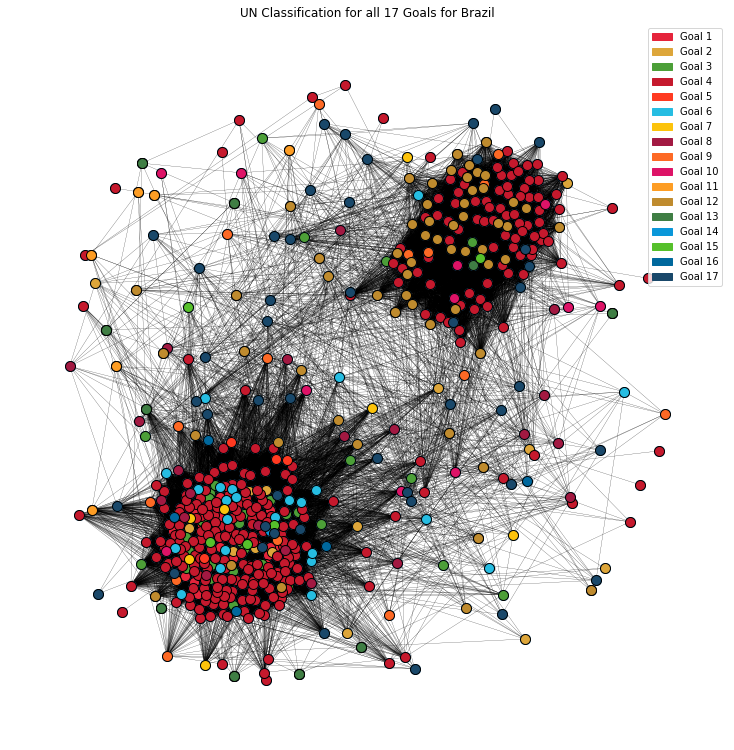

In [593]:
#Drawing network for Actual UN classification for All Goals
plt.figure(1,figsize=(10,10))
#Draw full network
nx.draw(G, posAll, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.2)
#Draw nodes so can add colours depending on goal node is in
#Indicator nodes contains list of lists for nodes in network, list x has nodes from goal x
#Done for all 17 goals individually
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[0],node_size= 100, node_color=Goal1_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[1],node_size= 100, node_color=Goal2_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[2],node_size= 100, node_color=Goal3_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[3],node_size= 100, node_color=Goal4_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[4],node_size= 100, node_color=Goal5_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[5],node_size= 100, node_color=Goal6_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[6],node_size= 100, node_color=Goal7_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[7],node_size= 100, node_color=Goal8_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[8],node_size= 100, node_color=Goal9_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[9],node_size= 100, node_color=Goal10_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[10],node_size= 100, node_color=Goal11_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[11],node_size= 100, node_color=Goal12_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[12],node_size= 100, node_color=Goal13_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[13],node_size= 100, node_color=Goal14_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[14],node_size= 100, node_color=Goal15_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[15],node_size= 100, node_color=Goal16_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=IndicatorNodes[16],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')
plt.title('UN Classification for all 17 Goals for Brazil')
#Add legend with correct colours
plt.legend(loc='upper right',handles=[Goal1_patch,Goal2_patch,Goal3_patch,Goal4_patch,Goal5_patch,Goal6_patch,Goal7_patch,Goal8_patch,Goal9_patch,Goal10_patch,Goal11_patch,Goal12_patch,Goal13_patch,Goal14_patch,Goal15_patch,Goal16_patch,Goal17_patch])
plt.show()

## Visualise community detection

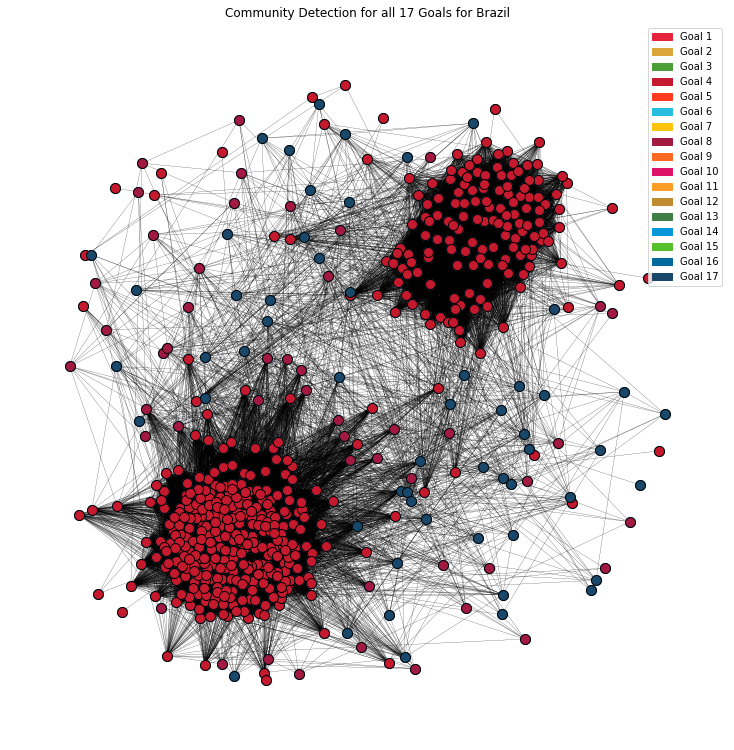

In [580]:
#Leiden 0.6 threshold classification for All Goals
plt.figure(1,figsize=(10,10))
#Plot full network
nx.draw(G, posAll, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.2)
#Plot each community from community list, colouring all the nodes in that community by the classification 
#we determined before. Can set the edgecolour of the nodes a different colour if two goals are classified as
#both making up the same amount of the community
nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[0],node_size= 100, node_color=Goal4_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[1],node_size= 100, node_color=Goal4_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[2],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[3],node_size= 100, node_color=Goal8_colour).set_edgecolor('black')
nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[4],node_size= 100, node_color=Goal4_colour).set_edgecolor('black')

#EXTRA LINES IF MORE COMMUNITIES PRESENT
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[5],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[6],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[7],node_size= 100, node_color=Goal17_colour).set_edgecolor('black')
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[8], node_color=Goal2_colour).set_edgecolor('black')
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[9], node_color=Goal1_colour).set_edgecolor('black')
#nx.draw_networkx_nodes(G, posAll, nodelist=coms.communities[10], node_color=Goal17_colour).set_edgecolor('black')
plt.title('Community Detection for all 17 Goals for Brazil')
#Plot legend with correct colours
plt.legend(loc='upper right',handles=[Goal1_patch,Goal2_patch,Goal3_patch,Goal4_patch,Goal5_patch,Goal6_patch,Goal7_patch,Goal8_patch,Goal9_patch,Goal10_patch,Goal11_patch,Goal12_patch,Goal13_patch,Goal14_patch,Goal15_patch,Goal16_patch,Goal17_patch])
plt.show()